# QA/QG problems
TODO
1. Look at the big picture. x
2. Get the data. x
3. Discover and visualize the data to gain insights. x
4. Prepare the data for Machine Learning algorithms. 
5. Select a model and train it.
6. Fine-tune the model.
7. Present the solution.
8. Launch, monitor, and maintain the system.


## Download and extract the datasets

In [9]:
# Lib
import zipfile
import pandas as pd
import os
import gdown
import os

In [ ]:
# download the dataset from Google Drive
file_id = "1BEnzsFtzhN0MnNoDie2BoAXVwtocVhA2" 

parent_dir = os.path.dirname(os.getcwd())
output = os.path.join(parent_dir, "datasets.zip")

# Create downloadable URL
url = f"https://drive.google.com/uc?id={file_id}"

# Download
gdown.download(url, output, quiet=False)

Downloading...
From (original): https://drive.google.com/uc?id=1BEnzsFtzhN0MnNoDie2BoAXVwtocVhA2
From (redirected): https://drive.google.com/uc?id=1BEnzsFtzhN0MnNoDie2BoAXVwtocVhA2&confirm=t&uuid=5ff5cf0e-8716-4f04-b13c-2a2b04ad205b
To: d:\Code\python\text2quiz\datasets.zip
100%|██████████| 31.9M/31.9M [00:09<00:00, 3.30MB/s]


'd:\\Code\\python\\text2quiz\\datasets.zip'

In [ ]:
# Extract path
extract_path = os.path.dirname(os.getcwd())
os.makedirs(extract_path, exist_ok=True)  # Ensure the directory exists

# Extract
zip_path = os.path.join(parent_dir, "datasets.zip")

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print(f"✅ Extracted to: {extract_path}")


✅ Extracted to: d:\Code\python\text2quiz


## Convert .parquet to .csv and json (if have)

In [14]:

# SqUAd Dataset path
SQUAD_PATH = "../datasets/SQuAD2.0/raw"
# ViQuAD Dataset path
VIQUAD_PATH = "../datasets/ViQuAD2.0/raw"

def convert_parquet_files(dataset_path):
    csv_output = os.path.join(dataset_path, "csv")
    json_output = os.path.join(dataset_path, "json")
    os.makedirs(csv_output, exist_ok=True)
    os.makedirs(json_output, exist_ok=True)

    for filename in os.listdir(dataset_path):
        if filename.endswith(".parquet"):
            file_path = os.path.join(dataset_path, filename)
            split_name = filename.replace(".parquet", "")
            
            # Read parquet
            df = pd.read_parquet(file_path)

            # Save CSV
            df.to_csv(os.path.join(csv_output, f"{split_name}.csv"), index=False)

            # Save JSON
            df.to_json(os.path.join(json_output, f"{split_name}.json"), orient="records", lines=True)

            print(f"✅ Converted {filename} → CSV & JSON in {dataset_path}")

In [15]:
# Convert SQuAD dataset
convert_parquet_files(SQUAD_PATH)

In [16]:
# Convert ViQuAD dataset
convert_parquet_files(VIQUAD_PATH)

## Visualize data

In [18]:
# Load train data from CSV
squad_df = pd.read_csv("../datasets/SQuAD2.0/raw/csv/train.csv")
viquad_df = pd.read_csv("../datasets/ViQuAD2.0/raw/csv/train.csv")

# Overview of the datasets
print("SQuAD:")
print(squad_df.info())
print(squad_df.describe(include='all'))

SQuAD:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130319 entries, 0 to 130318
Data columns (total 5 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   id        130319 non-null  object
 1   title     130319 non-null  object
 2   context   130319 non-null  object
 3   question  130319 non-null  object
 4   answers   130319 non-null  object
dtypes: object(5)
memory usage: 5.0+ MB
None
                              id           title  \
count                     130319          130319   
unique                    130319             442   
top     5a7e070b70df9f001a87543d  Queen_Victoria   
freq                           1             883   

                                                  context  \
count                                              130319   
unique                                              19029   
top     In 1853, Victoria gave birth to her eighth chi...   
freq                                                   30   

In [19]:
print("\nViQuAD:")
print(viquad_df.info())
print(viquad_df.describe(include='all'))


ViQuAD:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28454 entries, 0 to 28453
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 28454 non-null  object
 1   uit_id             28454 non-null  object
 2   title              28454 non-null  object
 3   context            28454 non-null  object
 4   question           28454 non-null  object
 5   answers            28454 non-null  object
 6   is_impossible      28454 non-null  bool  
 7   plausible_answers  9216 non-null   object
dtypes: bool(1), object(7)
memory usage: 1.5+ MB
None
                    id      uit_id                   title  \
count            28454       28454                   28454   
unique           28454       28454                     138   
top     0138-0223-0007  uit_028457  Chiến tranh Đông Dương   
freq                 1           1                    1412   

                                                

In [20]:
# An instance of SQuAD dataset
print("\nSQuAD Sample:")
print(squad_df.iloc[0])
# An instance of ViQuAD dataset
print("\nViQuAD Sample:")
print(viquad_df.iloc[0])


SQuAD Sample:
id                                   56be85543aeaaa14008c9063
title                                                 Beyoncé
context     Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ b...
question             When did Beyonce start becoming popular?
answers     {'text': array(['in the late 1990s'], dtype=ob...
Name: 0, dtype: object

ViQuAD Sample:
id                                                      0001-0001-0001
uit_id                                                      uit_000001
title                                                    Phạm Văn Đồng
context              Phạm Văn Đồng (1 tháng 3 năm 1906 – 29 tháng 4...
question             Tên gọi nào được Phạm Văn Đồng sử dụng khi làm...
answers              {'text': array(['Lâm Bá Kiệt'], dtype=object),...
is_impossible                                                    False
plausible_answers                                                  NaN
Name: 0, dtype: object


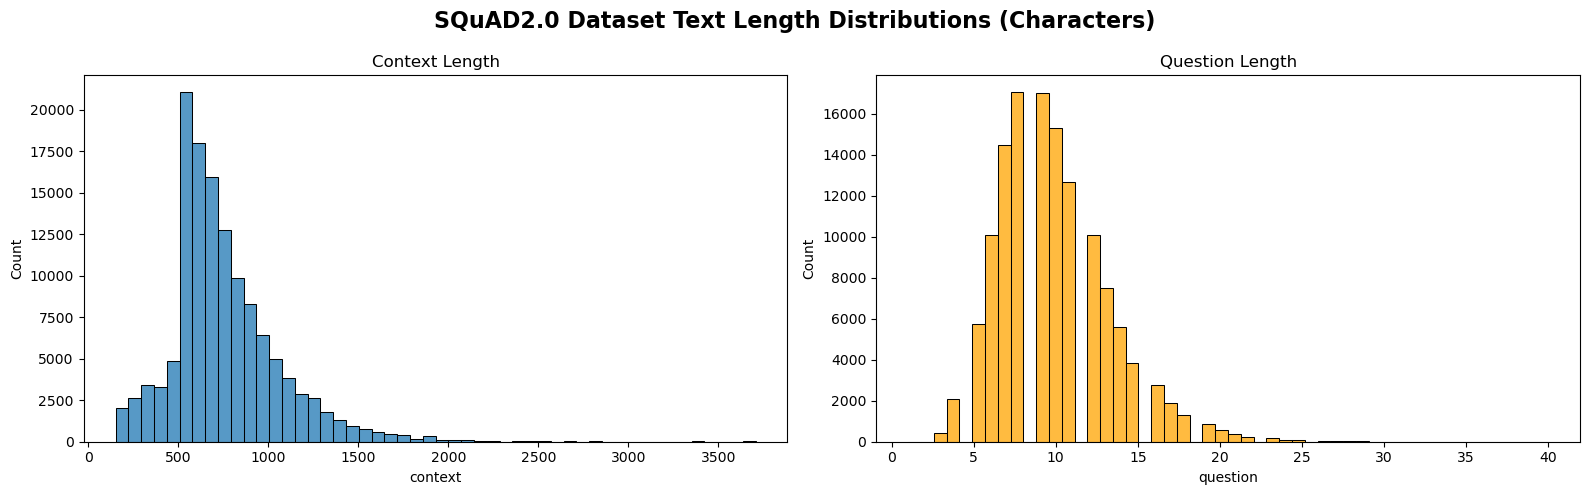

In [21]:
squad_context_len= squad_df["context"].str.len()
squad_question_len = squad_df["question"].str.split().str.len()


# Histogram
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 5))
plt.subplot(1, 2, 1)
sns.histplot(squad_context_len, bins=50)
plt.title("Context Length")

plt.subplot(1, 2, 2)
sns.histplot(squad_question_len, bins=50, color='orange')
plt.title("Question Length")

# plt.subplot(1, 3, 3)
# sns.histplot(squad_df["answer_len"], bins=50, color='green')
# plt.title("Answer Length")

plt.tight_layout()
plt.subplots_adjust(top=0.85)
plt.suptitle("SQuAD2.0 Dataset Text Length Distributions (Characters)", fontsize=16, fontweight='bold')

plt.show()


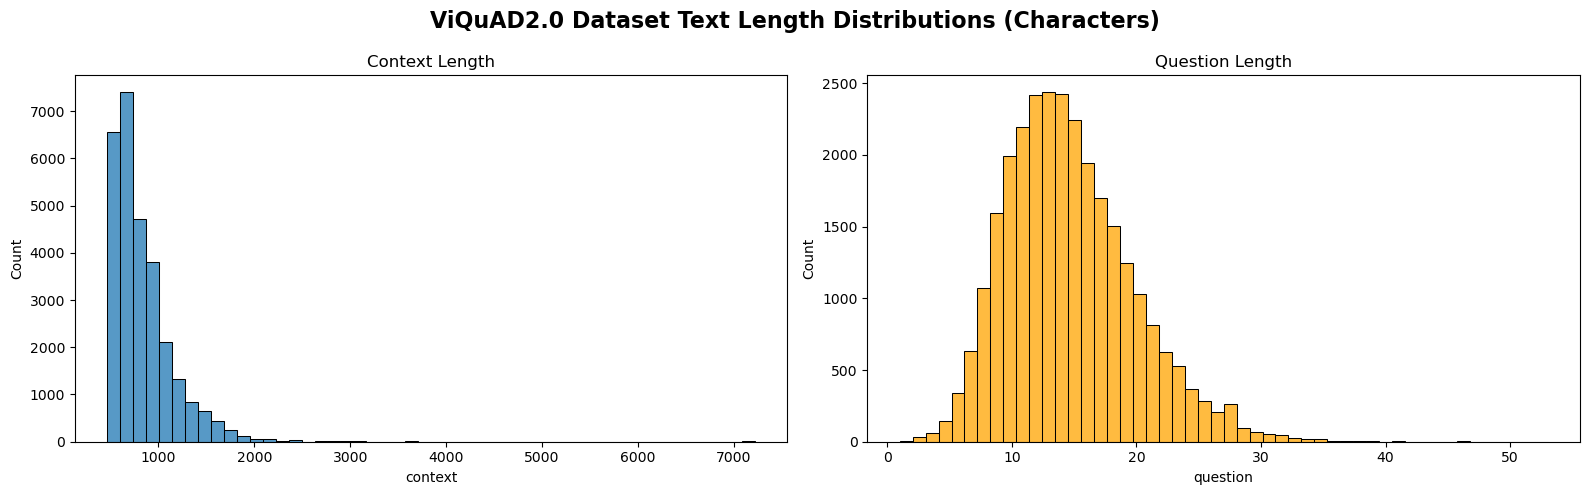

In [22]:
viquad_context_len = viquad_df["context"].str.len()
viquad_question_len = viquad_df["question"].str.split().str.len()
# Histogram
plt.figure(figsize=(16, 5))
plt.subplot(1, 2, 1)
sns.histplot(viquad_context_len, bins=50)
plt.title("Context Length")
plt.subplot(1, 2, 2)
sns.histplot(viquad_question_len, bins=50, color='orange')
plt.title("Question Length")

plt.tight_layout()
plt.subplots_adjust(top=0.85)
plt.suptitle("ViQuAD2.0 Dataset Text Length Distributions (Characters)", fontsize=16, fontweight='bold')

plt.show()

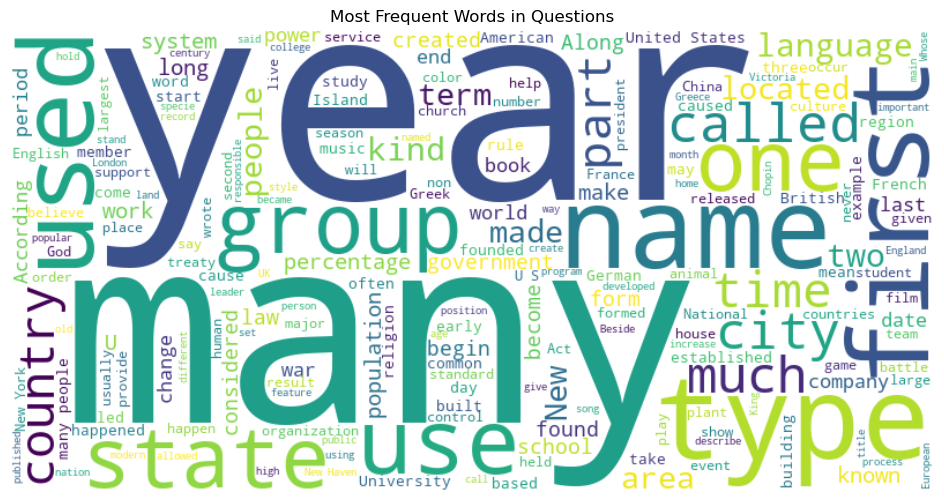

In [23]:
from wordcloud import WordCloud

text = " ".join(squad_df["question"].dropna().tolist())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Most Frequent Words in Questions")
plt.show()


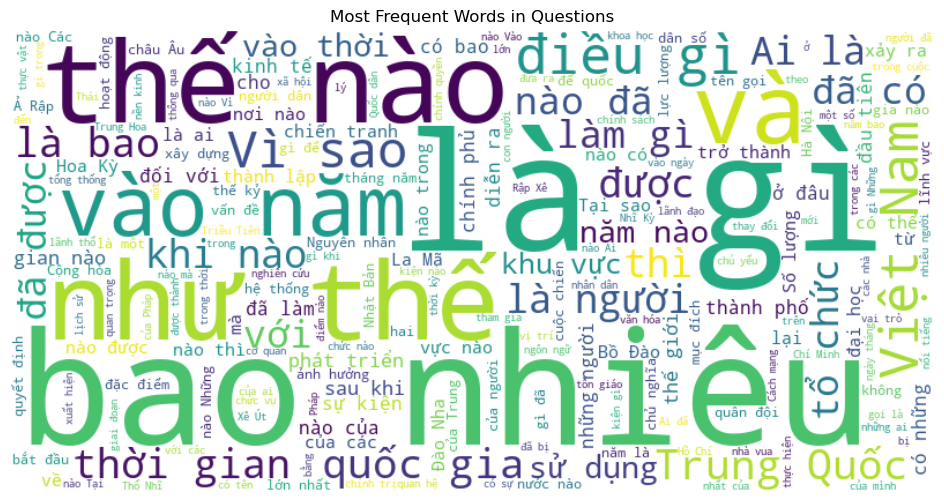

In [24]:
text = " ".join(viquad_df["question"].dropna().tolist())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Most Frequent Words in Questions")
plt.show()


In [25]:
print("SQuAD Dataset Statistics:")
print("Total instances:", len(squad_df))
print("Unique questions:", squad_df["question"].nunique())
print("Duplicate questions:", squad_df["question"].duplicated().sum())
print("Unique contexts:", squad_df["context"].nunique())
print("\nViQuAD Dataset Statistics:")
print("Total instances:", len(viquad_df))
print("Unique questions:", viquad_df["question"].nunique())
print("Duplicate questions:", viquad_df["question"].duplicated().sum())
print("Unique contexts:", viquad_df["context"].nunique())

# show 1 example duplicate
print("\nExample of a duplicate question in SQuAD:")
duplicate_question = squad_df[squad_df["question"].duplicated()].iloc[0]
print(duplicate_question)

# show 1 example duplicate in ViQuAD
print("\nExample of a duplicate question in ViQuAD:")
duplicate_question_viquad = viquad_df[viquad_df["question"].duplicated()].iloc[0]
print(duplicate_question_viquad)


SQuAD Dataset Statistics:
Total instances: 130319
Unique questions: 130217
Duplicate questions: 102
Unique contexts: 19029

ViQuAD Dataset Statistics:
Total instances: 28454
Unique questions: 28451
Duplicate questions: 3
Unique contexts: 4101

Example of a duplicate question in SQuAD:
id                                   56bfa087a10cfb14005511d9
title                                                 Beyoncé
context     On January 7, 2012, Beyoncé gave birth to her ...
question               When did Beyonce have her first child?
answers     {'text': array(['January 7, 2012'], dtype=obje...
Name: 255, dtype: object

Example of a duplicate question in ViQuAD:
id                                                      0027-0028-0001
uit_id                                                      uit_004447
title                                            Thành phố Hồ Chí Minh
context              Thành phố Hồ Chí Minh có toạ độ 10°10' – 10°38...
question             Thành phố Hồ Chí Minh có vị tr

## Clear data
Input: .csv file (train, validation, test)
1. Clear duplicate questions, incorrect data(in ViQuAD2.0, base on row is_impossible ) in all file.csv(train, validation, test) of 2 datasets
2. Drop rows(title, is_imposible, plausible_andsers) for convert to 1 unique format in 2 datasets (id, context, question, answers)
Output: cleared .csv file (train, validation, test)

In [26]:
DATASETS = ['SQuAD2.0', 'ViQuAD2.0']
SPLITS = ['train', 'validation', 'test']
KEEP_COLUMNS = ['id', 'context', 'question', 'answers']
DATA_DIR = "../datasets"

def clear_data(dataset, split):
    """
    Clear duplicate questions and incorrect data in the specified dataset and split.
    """
    input_path = os.path.join(DATA_DIR, dataset, "raw", "csv", f"{split}.csv")
    output_path = os.path.join(DATA_DIR, dataset, "cleared", "csv", f"{split}.csv")
    os.makedirs(os.path.dirname(output_path), exist_ok=True)
    
    if not os.path.exists(input_path):
        print(f"❌ Input file does not exist: {input_path}")
        return
    
    try: 
        df = pd.read_csv(input_path)
        # Drop rows where is_impossible is True
        if dataset == 'ViQuAD2.0' and 'is_impossible' in df.columns:
            df.drop(df[df['is_impossible'] == True].index, inplace=True)
        
        # Delete unnecessary columns
        for col in ['title', 'is_impossible', 'plausible_answers']:
            if col in df.columns:
                df.drop(columns=[col], inplace=True)

        # Delete duplicate questions
        if 'question' in df.columns:
            df = df.drop_duplicates(subset=['question'])

        # Keep only the necessary columns
        df = df[KEEP_COLUMNS]

        # Ghi file output
        df.to_csv(output_path, index=False)
        print(f"✅ Done: {dataset} {split} → {output_path} ({len(df)} rows)")
    except Exception as e:
        print(f"❌ Error processing {dataset} {split}: {e}")

In [ ]:
# Clear data
for dataset in DATASETS:
    for split in SPLITS:
        clear_data(dataset, split)

✅ Done: SQuAD2.0 train → ../datasets\SQuAD2.0\cleared\csv\train.csv (130217 rows)
✅ Done: SQuAD2.0 validation → ../datasets\SQuAD2.0\cleared\csv\validation.csv (11864 rows)
❌ Input file does not exist: ../datasets\SQuAD2.0\raw\csv\test.csv
✅ Done: ViQuAD2.0 train → ../datasets\ViQuAD2.0\cleared\csv\train.csv (19236 rows)
✅ Done: ViQuAD2.0 validation → ../datasets\ViQuAD2.0\cleared\csv\validation.csv (2653 rows)
✅ Done: ViQuAD2.0 test → ../datasets\ViQuAD2.0\cleared\csv\test.csv (7184 rows)


In [30]:
# Example of cleared data
squad_cleared_df = pd.read_csv(os.path.join(DATA_DIR, 'SQuAD2.0', 'cleared', 'csv', 'train.csv'))
print("\nSQuAD Cleared Data Sample:")
print(squad_cleared_df.head())
print("\nSQuAD Cleared Data Info:")
print(squad_cleared_df.info())


SQuAD Cleared Data Sample:
                         id  \
0  56be85543aeaaa14008c9063   
1  56be85543aeaaa14008c9065   
2  56be85543aeaaa14008c9066   
3  56bf6b0f3aeaaa14008c9601   
4  56bf6b0f3aeaaa14008c9602   

                                             context  \
0  Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ b...   
1  Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ b...   
2  Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ b...   
3  Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ b...   
4  Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ b...   

                                            question  \
0           When did Beyonce start becoming popular?   
1  What areas did Beyonce compete in when she was...   
2  When did Beyonce leave Destiny's Child and bec...   
3      In what city and state did Beyonce  grow up?    
4         In which decade did Beyonce become famous?   

                                             answers  
0  {'text': array(['in the late 1990s'], dtype=ob...  
1

In [31]:
viquad_cleared_df = pd.read_csv(os.path.join(DATA_DIR, 'ViQuAD2.0', 'cleared', 'csv', 'train.csv'))
print("\nViQuAD Cleared Data Sample:")
print(viquad_cleared_df.head())
print("\nViQuAD Cleared Data Info:")
print(viquad_cleared_df.info())


ViQuAD Cleared Data Sample:
               id                                            context  \
0  0001-0001-0001  Phạm Văn Đồng (1 tháng 3 năm 1906 – 29 tháng 4...   
1  0001-0001-0002  Phạm Văn Đồng (1 tháng 3 năm 1906 – 29 tháng 4...   
2  0001-0001-0003  Phạm Văn Đồng (1 tháng 3 năm 1906 – 29 tháng 4...   
3  0001-0001-0007  Phạm Văn Đồng (1 tháng 3 năm 1906 – 29 tháng 4...   
4  0001-0002-0001  Năm 1954, ông được giao nhiệm vụ Trưởng phái đ...   

                                            question  \
0  Tên gọi nào được Phạm Văn Đồng sử dụng khi làm...   
1  Phạm Văn Đồng giữ chức vụ gì trong bộ máy Nhà ...   
2  Giai đoạn năm 1955-1976, Phạm Văn Đồng nắm giữ...   
3  Chủ tịch Hội đồng Bộ trưởng đầu tiên của nước ...   
4  Sự kiện quan trọng nào đã diễn ra vào ngày 20/...   

                                             answers  
0  {'text': array(['Lâm Bá Kiệt'], dtype=object),...  
1  {'text': array(['Thủ tướng'], dtype=object), '...  
2  {'text': array(['Thủ tướng Chính 